# Data analyses Crane datasets

Date: 27-01-2020 <br>
Concept version: 1.0 <br>
Author: Pieter Lems  <br>
© Copyright 2019 Ministerie van Defensie

## Contents notebook
- Import required modules
- Define generic functions
- Per Country:
  - Import sets
  - Basic analysis of the first Crane dataset
  - Basic analysis of remaining Crane datasets
  - Visualize Crane datasets
  - Filter Crane datasets
  - Export Crane datasets to JSON
  - Export Crane datasets to GeoJSON
- Compare German and Swedish crane Datasets
  - Compare  sets

---
## Note 
- The data analyses of the first dataset(per country) will be done manually. The rest of the datasets(per country), will be analysed using the generic function:"basic_analyses()"
- The GeoJSON data will not be used during the creation of the application. The reason it's describe how this is done, is because it can be usefull in other cases. Converting fileformats to GeoJSON can also be done using geopandas(See Cookbook: ETL-Process with datasets)

## Datasets used in notebook. ("../Data/Crane_CSV/")
- Swedish Crane datasets
    - 20181003_Dataset_SV_GPS_Crane_9381_STAW_Crane_RRW-BuGBk_Frida.csv
    - 20181003_Dataset_SV_GPS_Crane_9407_STAW_Crane_RRW-BuGBk_Agnetha.csv
    - 20181003_Dataset_SV_GPS_Crane_9472_STAW_Crane_RRW-BuGR_Cajsa.csv

- German Crane datasets
    - 20180928_Dataset_DE_GPS_Crane_181527_iCora_Crane_13_BuBuBr-YBuBk.csv
    - 20191103_Dataset_DE_GPS_Crane_181528_iCora_Crane_15_BuBuBr-WYW_Lotta.csv
 
- Lithuanian Crane datasets
    - 20200103_Movebank_Common_Crane_Lithuania_GPS_2016_Dataset.csv
  
    
    

---
## Import required modules
---

In [1]:
import pandas as pd
import cartopy
import cartopy.crs as ccrs 
import cartopy.feature as cfeature 
import matplotlib.pyplot as plt

---
## Define generic functions

---
### Function: create_plot()
This function creates a plot from the inserted data on the map.

- parameter 1: The dataframe you want to plot
- parameter 2: The longitude column in the dataframe
- parameter 3: The latitude column in the dataframe

In [2]:
def create_plot(df,lonColumn,latColumn):
    return plt.plot(df[lonColumn], df[latColumn])

---
### Function: init_cartopymap():
This function creates a new cartopyMap and then returns the map instance

In [3]:
def init_cartopymap():
    
    plt.figure(figsize = (20, 12))
    
    m = plt.axes(projection=ccrs.PlateCarree())

    m.coastlines(resolution='10m')
    
    m.add_feature(cartopy.feature.LAND.with_scale('10m'), edgecolor='black', facecolor = "white")
    
    m.add_feature(cfeature.OCEAN)
    
    m.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor = 'black')
    
    m.add_feature(cfeature.RIVERS.with_scale('10m')) 
    
    m.add_feature(cfeature.BORDERS.with_scale('10m'))

    return m 

---
### Function: dfs_on_cartopymap():
This function creates a map and visualizes the inserted dataframes on a CartopyMap

- parameter 1: A list of dataframes, this can also be a list of just one dataframe
- parameter 2: The longitude column in the dataframe
- parameter 3: The latitude column in the dataframe
- parameter 4: The color of the datapoints
- parameter 5: The size of the datapoints

In [4]:
def dfs_on_cartopymap(dfList,lonColumn,latColumn,color,size):

    m = init_cartopymap()
    
    for df in dfList: 
        
        m.scatter(df[lonColumn], 
                  df[latColumn],
                  color=color, 
                  s = size)    
    return m

---
### Function: compare_sets()
This function compares the columns of 2 datasets and returns "are equal" if the columns of both datasets are the same. <br> The function returns the differences if the columns of both sets are not equal.

- Parameter 1 = the first set you want to compare<br>
- Parameter 2 = the second set you want to compare

In [5]:
def compare_sets(set1,set2):
    
    # Create an empty list to append differences to
    diffs_set2=["IN SWEDISH BUT NOT IN GERMAN:",'']
    diffs_set1 =["IN GERMAN BUT NOT IN SWEDISH:",'']
    
    # Create an empty list to append equalities to
    eqs = ["IN BOTH SETS:",'']
    
    # Check is sets are the same
    # If True return "sets are equal"
    if set1.equals(set2):
        return "Sets are equal"
        
    # Compare sets and append diffs and eqs to corresponding lists
    else:
        for x in set1:
            if x in set2:
                eqs.append(x)
            if x not in set2:
                diffs_set1.append(x)
        for x in set2:
            if x not in set1:
                diffs_set2.append(x)
    return diffs_set1, diffs_set2,eqs

---
### Function: basic_analysis()
This function performs a basic data analyses on an CSV file. <br>
- Parameter 1 = The file location of the CSV file

In [6]:
def basic_analysis(file_input):
    df = pd.read_csv(file_input)
    
    print('\n--------------------------------BASIC INFORMATION-------------------------------\n\n')
    
    print("Dataframe length: " + str(len(df))+'\n') 
    
    print("Dataframe columns:" + str(len(df.columns))+'\n')
    
    print("Start date of study :" + str(df[:1].timestamp)+'\n')
    
    print("Start position (latitude) :" + str(df[:1]['location-lat'])+'\n')
    
    print("Start position (longitude) :" + str(df[:1]['location-long'])+'\n')
    
    print("End date of study :"  + str(df[-1:].timestamp)+'\n')
    
    print("End position (latitude) :" + str(df[-1:]['location-lat'])+'\n')
    
    print("End position (longitude) :" + str(df[-1:]['location-long'])+'\n')
    
    print('\n------------------------------COLUMNS AND DATA TYPES----------------------------\n\n')
    
    print(df.dtypes)
    
    print('\n------------------------------FIRST ROW OF DATAFRAME----------------------------\n\n')
    
    return df

---
# Swedish Cranes

Attaching the transmitters was done in a place called Grimsås, Sweden. 

Some info about the data set:
- The tracker contains a GPS sensor and a few other environmental sensors, of which the sensor data every 15 minutes (4x / hour) if an SMS message is sent via a GSM channel sent. All that sensor data can be found in the logbook.
- The color ring code of this crane is RRW-BuGBk and can be found in the column Search Studies by clicking on the small black web link Implementations, along with its tracker ID and the ring number of the metal ring with which the bird is ringed.
- Details: the most famous location is North-East France.

This datasets are obtained from https://www.movebank.org/. 

---
## Agnetha
### A Swedish Crane

---

#### Read the CSV dataset using Pandas.

In [97]:
Agnetha = pd.read_csv(
    '../Data/Crane_CSV/20181003_Dataset_SV_GPS_Crane_9407_STAW_Crane_RRW-BuGBk_Agnetha.csv')

#### Print the amount of datarows (Transmissions).

In [98]:
len(Agnetha)

44534

#### Print the amount of columns in the dataset.

In [99]:
len(Agnetha.columns)

19

#### Print information related to the start position / date.

In [100]:
print("Start date of study :" + str(Agnetha[:1].timestamp)+'\n')
print("Start position (latitude) :" + str(Agnetha[:1]['location-lat'])+'\n')
print("Start position (longitude) :" + str(Agnetha[:1]['location-long'])+'\n')

Start date of study :0    2013-07-20 03:04:08.000
Name: timestamp, dtype: object

Start position (latitude) :0    57.390537
Name: location-lat, dtype: float64

Start position (longitude) :0    13.27158
Name: location-long, dtype: float64



#### Print information related to the end position / date.

In [141]:
print("End date of study :"  + str(Agnetha[-1:].timestamp)+'\n')
print("End position (latitude) :" + str(Agnetha[-1:]['location-lat'])+'\n')
print("End position (longitude) :" + str(Agnetha[-1:]['location-long'])+'\n')

End date of study :44533    2017-03-01 06:00:09.000
Name: timestamp, dtype: object

End position (latitude) :44533    40.956871
Name: location-lat, dtype: float64

End position (longitude) :44533   -1.476963
Name: location-long, dtype: float64



#### Show first row of dataframe.

In [142]:
Agnetha[:1]

,event-id,visible,timestamp,location-long,location-lat,argos:altitude,gps:fix-type,gps:hdop,gps:vdop,ground-speed,heading,height-above-ellipsoid,tag-tech-spec,tag-voltage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,1154832230,True,2013-07-20 03:04:08.000,13.27158,57.390537,NaN,3,2.5,4.2,0.0,NaN,168.0,NaN,4180.0,gps,Grus grus,9407,9407,"GPS telemetry of Common Cranes, Sweden"


#### Print columnames and their datatypes.

In [143]:
Agnetha.dtypes

event-id                             int64
visible                               bool
timestamp                           object
location-long                      float64
location-lat                       float64
argos:altitude                     float64
gps:fix-type                         int64
gps:hdop                           float64
gps:vdop                           float64
ground-speed                       float64
heading                            float64
height-above-ellipsoid             float64
tag-tech-spec                      float64
tag-voltage                        float64
sensor-type                         object
individual-taxon-canonical-name     object
tag-local-identifier                 int64
individual-local-identifier          int64
study-name                          object
dtype: object

#### Create a table and put the values, obtained from the line above, in that table.

#### Columns with their data type (19): 

|Column|Type|Desc.|
|--|--|--|
|event-id | int| The ID of the transmission (Unique) |
|visible|bool | Is the tracker still visible or not? | 
|timestamp |datetime| The DateTime of transmission |
|location-long| float|The Longitude location |
|location-lat | float| The Latitude location |
|argos:altitude|float | Argos type sensor for height of the transmission |
|gps:fix-type | int| Type of GPS Tracker |
|gps:hdop| float| Horizontal dilution of precision|
|gps:vdop| float| Vertical dilution of precision |
|ground-speed|float | Speed of the bird while on the ground. |
|heading | float| Direction the bird is faceing (In degrees) |
|height-above-ellipsoid | float| Height of the bird HAE -> MSL |
|tag-tech-spec |float | |
|tag-voltage|float | Voltage level of the tracker. |
|sensor-type|string | Type of sensor used in tracker. |
|individual-taxon-canonical-name | string|Name of the bird, in latin. |
|tag-local-identifier |int |ID of the tracker.  |
|individual-local-identifier |int |ID of the bird |
|study-name | string|Name of the study |


#### Create a plot using MatplotLib.

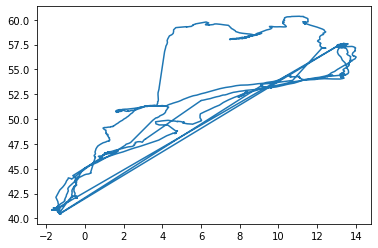

In [104]:
create_plot(Agnetha,'location-long','location-lat') 

#### Create a plot MatplotLib on CartopyMap.

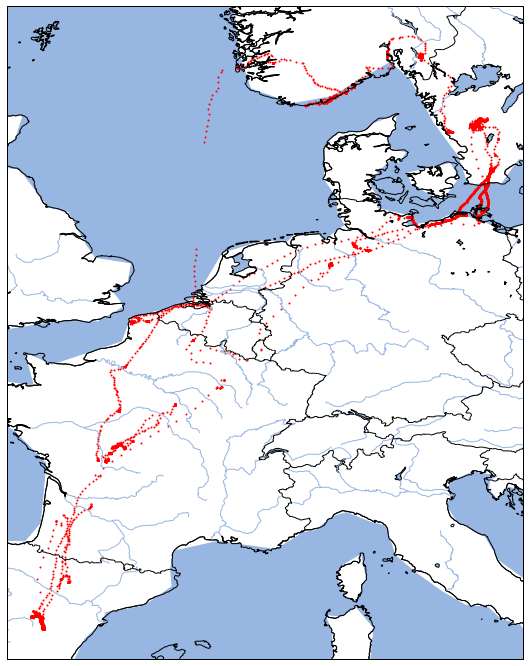

In [105]:
dfs_on_cartopymap([Agnetha],'location-long','location-lat','red',1)

---
## Frida
### A Swedish Crane 

---

#### Perform basic analyses of Crane dataset and assign the returned dataframe to a variable.

In [106]:
Frida = basic_analysis(
    '../Data/Crane_CSV/20181003_Dataset_SV_GPS_Crane_9381_STAW_Crane_RRW-BuGBk_Frida.csv')
Frida


--------------------------------BASIC INFORMATION-------------------------------


Dataframe length: 123805

Dataframe columns:19

Start date of study :0    2013-07-21 03:06:32.000
Name: timestamp, dtype: object

Start position (latitude) :0    57.503796
Name: location-lat, dtype: float64

Start position (longitude) :0    13.583908
Name: location-long, dtype: float64

End date of study :123804    2016-02-13 09:22:43.000
Name: timestamp, dtype: object

End position (latitude) :123804    52.646114
Name: location-lat, dtype: float64

End position (longitude) :123804    8.841743
Name: location-long, dtype: float64


------------------------------COLUMNS AND DATA TYPES----------------------------


event-id                             int64
visible                               bool
timestamp                           object
location-long                      float64
location-lat                       float64
argos:altitude                     float64
gps:fix-type                         i

,event-id,visible,timestamp,location-long,location-lat,argos:altitude,gps:fix-type,gps:hdop,gps:vdop,ground-speed,heading,height-above-ellipsoid,tag-tech-spec,tag-voltage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,1154727247,True,2013-07-21 03:06:32.000,13.583908,57.503796,NaN,3,2.0,3.0,0.0000,NaN,193.0,NaN,4110.0,gps,Grus grus,9381,9381,"GPS telemetry of Common Cranes, Sweden"
1,1154727246,True,2013-07-21 03:51:34.000,13.578312,57.504063,NaN,3,1.5,2.5,0.5144,NaN,194.0,NaN,4100.0,gps,Grus grus,9381,9381,"GPS telemetry of Common Cranes, Sweden"
2,1154727245,True,2013-07-21 04:07:09.000,13.578205,57.504150,NaN,3,1.1,1.5,0.0000,NaN,199.0,NaN,4110.0,gps,Grus grus,9381,9381,"GPS telemetry of Common Cranes, Sweden"
3,1154727244,True,2013-07-21 04:22:57.000,13.577142,57.504177,NaN,3,1.6,2.0,0.0000,NaN,194.0,NaN,4110.0,gps,Grus grus,9381,9381,"GPS telemetry of Common Cranes, Sweden"
4,1154727243,True,2013-07-21 04:38:39.000,13.576754,57.504238,NaN,3,1.1,1.6,0.0000,NaN,192.0,NaN,4110.0,gps,Grus grus,9381,9381,"GPS telemetry of Common Cranes, Sweden"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123800,1184857334,True,2016-02-11 16:18:02.000,8.841672,52.646145,NaN,3,1.3,2.3,0.0000,NaN,34.0,NaN,3640.0,gps,Grus grus,9381,9381,"GPS telemetry of Common Cranes, Sweden"
123801,1184857333,True,2016-02-11 16:23:44.000,8.841692,52.646160,NaN,3,1.0,1.7,0.0000,NaN,34.0,NaN,3630.0,gps,Grus grus,9381,9381,"GPS telemetry of Common Cranes, Sweden"
123802,1184857332,True,2016-02-13 08:51:38.000,8.841772,52.646118,NaN,3,1.1,1.4,0.0000,NaN,31.0,NaN,3640.0,gps,Grus grus,9381,9381,"GPS telemetry of Common Cranes, Sweden"
123803,1184857331,True,2016-02-13 09:07:14.000,8.841748,52.646114,NaN,3,1.0,1.2,0.0000,NaN,29.0,NaN,3670.0,gps,Grus grus,9381,9381,"GPS telemetry of Common Cranes, Sweden"


#### Create a plot using MatplotLib.

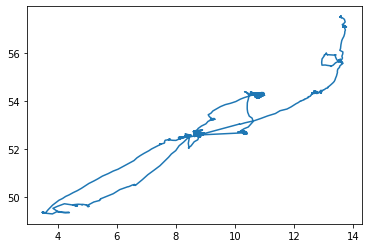

In [107]:
create_plot(Frida,'location-long','location-lat') 

#### Create a plot MatplotLib on CartopyMap.

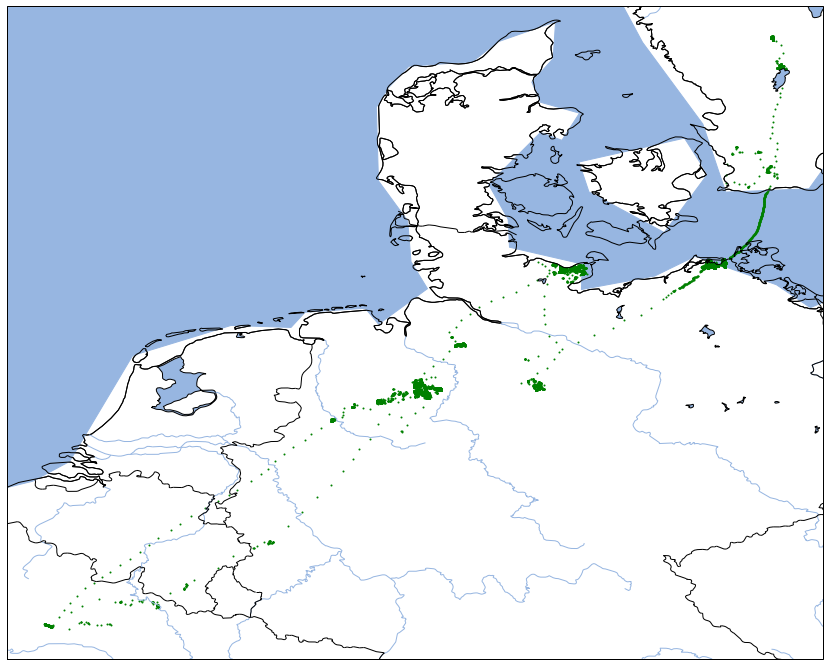

In [108]:
dfs_on_cartopymap([Frida],'location-long','location-lat','green',1)

---
## Cajsa
### A Swedish Crane 

---

#### Perform basic analyses of Crane dataset and assign the returned dataframe to a variable.

In [109]:
Cajsa = basic_analysis(
    '../Data/Crane_CSV/20181003_Dataset_SV_GPS_Crane_9472_STAW_Crane_RRW-BuGR_Cajsa.csv')
Cajsa


--------------------------------BASIC INFORMATION-------------------------------


Dataframe length: 67887

Dataframe columns:19

Start date of study :0    2013-07-20 04:35:39.000
Name: timestamp, dtype: object

Start position (latitude) :0    57.334858
Name: location-lat, dtype: float64

Start position (longitude) :0    13.316729
Name: location-long, dtype: float64

End date of study :67886    2016-08-20 15:52:39.000
Name: timestamp, dtype: object

End position (latitude) :67886    57.103359
Name: location-lat, dtype: float64

End position (longitude) :67886    13.705923
Name: location-long, dtype: float64


------------------------------COLUMNS AND DATA TYPES----------------------------


event-id                             int64
visible                               bool
timestamp                           object
location-long                      float64
location-lat                       float64
argos:altitude                     float64
gps:fix-type                         int6

,event-id,visible,timestamp,location-long,location-lat,argos:altitude,gps:fix-type,gps:hdop,gps:vdop,ground-speed,heading,height-above-ellipsoid,tag-tech-spec,tag-voltage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,1154936959,True,2013-07-20 04:35:39.000,13.316729,57.334858,NaN,3,2.8,3.3,0.0,NaN,175.0,NaN,4180.0,gps,Grus grus,9472,9472,"GPS telemetry of Common Cranes, Sweden"
1,1154936958,True,2013-07-20 04:50:09.000,13.317242,57.337940,NaN,3,1.8,2.0,0.0,NaN,168.0,NaN,4180.0,gps,Grus grus,9472,9472,"GPS telemetry of Common Cranes, Sweden"
2,1154936957,True,2013-07-20 05:05:39.000,13.318027,57.338490,NaN,3,1.4,1.9,0.0,NaN,176.0,NaN,4180.0,gps,Grus grus,9472,9472,"GPS telemetry of Common Cranes, Sweden"
3,1154936956,True,2013-07-20 05:21:09.000,13.318051,57.338459,NaN,3,1.1,1.3,0.0,NaN,178.0,NaN,4190.0,gps,Grus grus,9472,9472,"GPS telemetry of Common Cranes, Sweden"
4,1154936955,True,2013-07-20 05:36:39.000,13.318151,57.338467,NaN,3,1.2,1.4,0.0,NaN,173.0,NaN,4190.0,gps,Grus grus,9472,9472,"GPS telemetry of Common Cranes, Sweden"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67882,1881103425,True,2016-08-20 14:50:39.000,13.705769,57.103409,NaN,3,1.0,1.5,0.0,NaN,146.0,NaN,3580.0,gps,Grus grus,9472,9472,"GPS telemetry of Common Cranes, Sweden"
67883,1881103424,True,2016-08-20 15:06:09.000,13.706405,57.103455,NaN,3,1.1,2.3,0.0,NaN,144.0,NaN,3580.0,gps,Grus grus,9472,9472,"GPS telemetry of Common Cranes, Sweden"
67884,1881103423,True,2016-08-20 15:21:39.000,13.705929,57.103355,NaN,3,0.9,1.7,0.0,NaN,148.0,NaN,3570.0,gps,Grus grus,9472,9472,"GPS telemetry of Common Cranes, Sweden"
67885,1881103422,True,2016-08-20 15:37:09.000,13.705938,57.103367,NaN,3,1.0,1.7,0.0,NaN,144.0,NaN,3570.0,gps,Grus grus,9472,9472,"GPS telemetry of Common Cranes, Sweden"


#### Create a plot using MatplotLib.

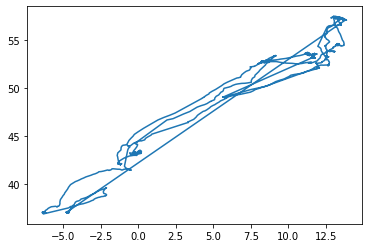

In [110]:
create_plot(Cajsa,'location-long','location-lat') 

#### Create a plot MatplotLib on CartopyMap.

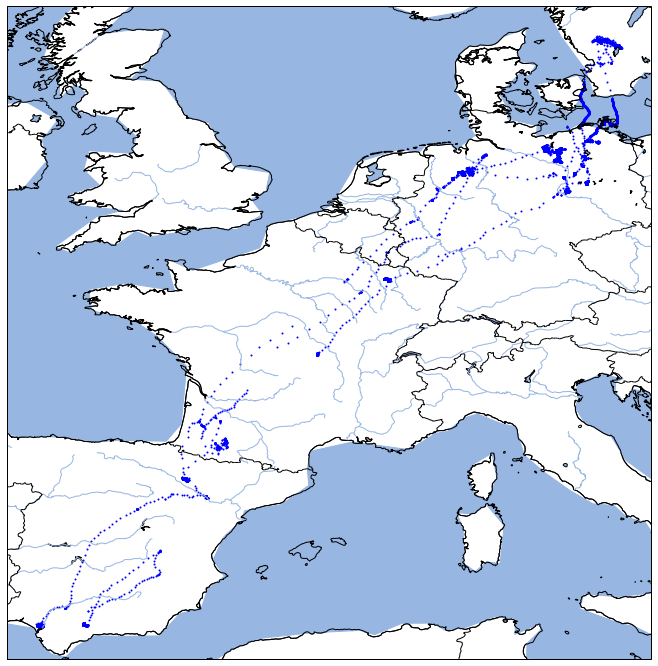

In [111]:
dfs_on_cartopymap([Cajsa],'location-long','location-lat','blue',1)

---
### Compare the datasets to check if all the columns are the same.
---

In [112]:
print(compare_sets(Cajsa.columns,Frida.columns))
print(compare_sets(Cajsa.columns,Agnetha.columns))
print(compare_sets(Frida.columns,Agnetha.columns))

Sets are equal
Sets are equal
Sets are equal


---
### Visualize all Swedish Crane datasets on a CartopyMap
---

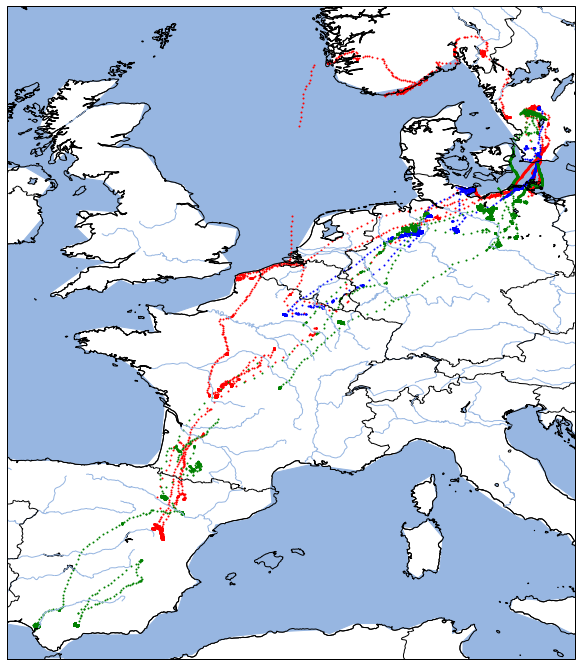

In [113]:
#Create the plot and assign size of the figure
plt.figure(figsize = (20, 12))

# Create the axes of the plot and assign the projection
m = plt.axes(projection=ccrs.PlateCarree())

# Create high resolution for coastal line
m.coastlines(resolution='10m')

# Add the land with a black edge color and white fill
m.add_feature(cartopy.feature.LAND.with_scale('10m'), edgecolor='black', facecolor = "white")

# Add the sea 
m.add_feature(cfeature.OCEAN) 

# Add lakes with a black edge color
m.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor = 'black')

# Add rivers
m.add_feature(cfeature.RIVERS.with_scale('10m')) 

# Add borders
m.add_feature(cfeature.BORDERS.with_scale('10m'))

# Add the first Swedish Crane set
m.scatter(Agnetha['location-long'], Agnetha['location-lat'],color="red", s = 1)

# Add the second Swedish Crane set
m.scatter(Frida['location-long'], Frida['location-lat'],color="blue", s = 1)

# Add the Third Swedish Crane set
m.scatter(Cajsa['location-long'], Cajsa['location-lat'],color="green", s = 1)

---
### Filter Swedish crane dataset

In [114]:
columns_to_filter = ['event-id', 'study-name',
                     'timestamp','visible',
                     'ground-speed','heading',
                     'location-long','location-lat',
                     'height-above-ellipsoid',
                     'individual-taxon-canonical-name',
                     'sensor-type','tag-voltage',                                          
                     'individual-local-identifier']

Filtered_Frida = Frida[columns_to_filter]

Filtered_Cajsa = Cajsa[columns_to_filter]

Filtered_Agnetha = Agnetha[columns_to_filter]

---
### Export Swedish Crane datasets to JSON
Create a json file en writing the contents of the dataframe using to_json() function.

- Parameter 1: filename of file that will be created
- Parameter 2: Orientation of the data. <br>

orientation "records" makes list like [{column -> value},{column -> value},....]

---

In [115]:
Filtered_Frida.to_json(
    '../Data/Crane_JSON/Frida-SW.json',
    orient = 'records')

Filtered_Cajsa.to_json(
    '../Data/Crane_JSON/Cajsa-SW.json',
    orient = 'records')

Filtered_Agnetha.to_json(
    '../Data/Crane_JSON/Agnetha-SW.json',
    orient = 'records')

In [116]:
print(compare_sets(Cajsa.columns,Frida.columns))
print(compare_sets(Cajsa.columns,Agnetha.columns))
print(compare_sets(Frida.columns,Agnetha.columns))

Sets are equal
Sets are equal
Sets are equal


---
# German Cranes

Attaching the transmitters was done in a place called Grimsås, Sweden. 

Some info about the data set:
- The tracker contains a GPS sensor and a few other environmental sensors, of which the sensor data every 15 minutes (4x / hour) if an SMS message is sent via a GSM channel sent. All that sensor data can be found in the logbook.
- The color ring code of this crane is RRW-BuGBk and can be found in the column Search Studies by clicking on the small black web link Implementations, along with its tracker ID and the ring number of the metal ring with which the bird is ringed.
- Details: the most famous location is North-East France.

This datasets are obtained from https://www.movebank.org/. 

---
## Lotta
### A German Crane
---

#### Read the CSV dataset using Pandas.

In [117]:
Lotta = pd.read_csv(
    '../Data/Crane_CSV/20191103_Dataset_DE_GPS_Crane_181528_iCora_Crane_15_BuBuBr-WYW_Lotta.csv')


#### Print the amount of datarows (Transmissions).

In [118]:
len(Lotta)

29934

#### Print the amount of columns in the dataset.

In [119]:
len(Lotta.columns)

30

#### Print information related to the start position / date.

In [120]:
print("Start date of study :" + str(Lotta[:1].timestamp)+'\n')
print("Start position (latitude) :" + str(Lotta[:1]['location-lat'])+'\n')
print("Start position (longitude) :" + str(Lotta[:1]['location-long'])+'\n')

Start date of study :0    2018-06-15 06:24:55.000
Name: timestamp, dtype: object

Start position (latitude) :0    54.335003
Name: location-lat, dtype: float64

Start position (longitude) :0    13.429357
Name: location-long, dtype: float64



#### Print information related to the end position / date.

In [121]:
print("End date of study :"  + str(Lotta[-1:].timestamp)+'\n')
print("End position (latitude) :" + str(Lotta[-1:]['location-lat'])+'\n')
print("End position (longitude) :" + str(Lotta[-1:]['location-long'])+'\n')

End date of study :29933    2019-11-03 11:23:04.000
Name: timestamp, dtype: object

End position (latitude) :29933    54.114182
Name: location-lat, dtype: float64

End position (longitude) :29933    12.004008
Name: location-long, dtype: float64



#### Show first row of dataframe.

In [122]:
Lotta[:1]

,event-id,visible,timestamp,location-long,location-lat,acceleration-raw-x,acceleration-raw-y,acceleration-raw-z,bar:barometric-height,battery-charge-percent,...,mag:magnetic-field-raw-x,mag:magnetic-field-raw-y,mag:magnetic-field-raw-z,orn:transmission-protocol,tag-voltage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,6926602555,True,2018-06-15 06:24:55.000,13.429357,54.335003,-576,37,872,0,98,...,-0.405,0.068,0.406,GPRS,4139,gps,Grus grus,181528,181528,GPS 181528 Updated


#### Print columnames and their datatypes.

In [123]:
Lotta.dtypes

event-id                             int64
visible                               bool
timestamp                           object
location-long                      float64
location-lat                       float64
acceleration-raw-x                   int64
acceleration-raw-y                   int64
acceleration-raw-z                   int64
bar:barometric-height                int64
battery-charge-percent               int64
battery-charging-current             int64
external-temperature                 int64
gps:hdop                           float64
gps:satellite-count                  int64
gps-time-to-fix                    float64
ground-speed                       float64
heading                              int64
height-above-msl                     int64
import-marked-outlier                 bool
gls:light-level                      int64
mag:magnetic-field-raw-x           float64
mag:magnetic-field-raw-y           float64
mag:magnetic-field-raw-z           float64
orn:transmi

#### Create a table and put the values, obtained from the line above, in that table.

#### Columns with their data type (30): 

|Column|Type|Desc.|
|--|--|--|
|event-id | int| The ID of the transmission (Unique) |
|visible|bool | Is the tracker still visible or not? | 
|timestamp |datetime| The DateTime of transmission |
|location-long| float|The Longitude location |
|location-lat | float| The Latitude location |
|acceleration-raw-x|float|Speed +/- from last transmission x |
|acceleration-raw-y|float|Speed +/- from last transmission y |
|acceleration-raw-z|float|Speed +/- from last transmission z |
|bar:barometric-height |float|Pressure on the sensor. |
|battery-charge-percent|int| Battery power left in percentage.|
|battery-charging-current |float| Current running trough the battery in Ampere|
|external-temperature  |float|Temperature of the tracker measured in degrees celsius|
|gps:hdop| float| Horizontal dilution of precision|
|gps:satelitte-count |int | |
|gps-time-to-fix|float |time to acquire satellite signals in seconds.|
|ground-speed|float | Speed of the bird while on the ground. |
|heading | float| Direction the bird is faceing (In degrees) |
|height-above-msl | float| Height of the bird (above mean sea level) |
|import-marked-outlier|bool||
|gls:light-level| float|Amount of light recieved by tracker, measured in ambient light level|
|mag:magnetic-field-raw-x | float||
|mag:magnetic-field-raw-y |float||
|mag:magnetic-field-raw-z | float||
|orn:transmission-protocol | string |Type of transmission protocol |
|tag-voltage |float| Voltage level of the tracker. |
|sensor-type | string |Type of sensor used in tracker.  |
|individual-taxon-canonical-name | string | Name of the bird, in latin. |
|tag-local-identifier| int | ID of the tracker |
|individual-local-identifier | int|ID of the crane |
|study-name |string|Name of the study |

#### Sensors in sets

|X|Sensors|Desc|
|--|--|--|
|1|BAR|Baromatric sensor|
|2|GPS|Location sensor|
|3|MAG|A MEMS magnetic field sensor|
|4|ORN|A transmission protocol sensor|
|5|GLS|A light level geolocator,|


#### Info on sensors:
- Bar: Baromatric sensor used to measure the pressure on an object.
- Gps: Sensor used for data related to GPS
- Mag: A MEMS magnetic field sensor is a small-scale microelectromechanical systems (MEMS) device for detecting and measuring magnetic fields (Magnetometer). Many of these operate by detecting effects of the Lorentz force: a change in voltage or resonant frequency may be measured electronically, or a mechanical displacement may be measured optically. Compensation for temperature effects is necessary. Its use as a miniaturized compass may be one such simple example application.
- GLS: A light level geolocator, light-level logger or GLS (global location sensor) is essentially a lightweight, electronic archival tracking device, usually used in bird migration research to map migration routes, identify important staging areas, and sometimes provide additional ecological information. A geolocator periodically records ambient light level (solar irradiance) to determine location.
- Orn: Sensor used for tranmssion protocols.



#### Create a plot using MatplotLib.

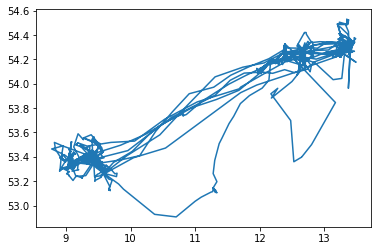

In [124]:
create_plot(Lotta,'location-long','location-lat') 

#### Create a plot MatplotLib on CartopyMap.

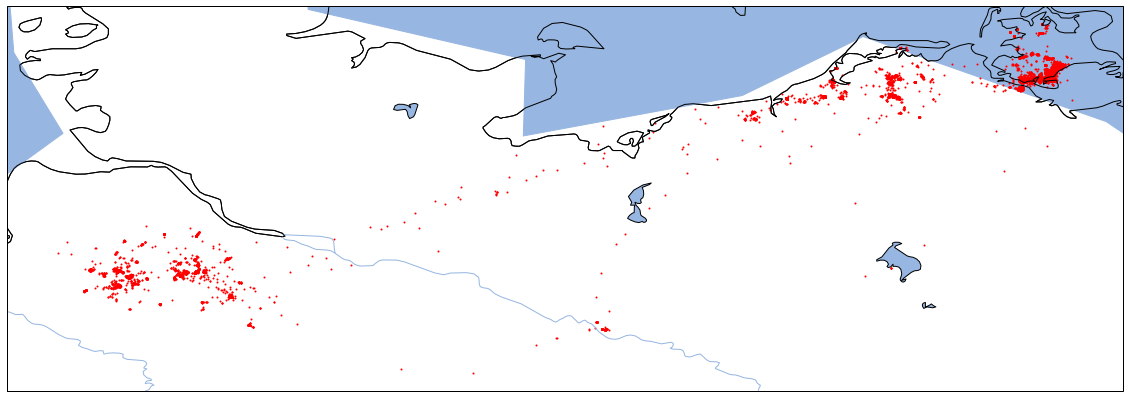

In [125]:
dfs_on_cartopymap([Lotta],'location-long','location-lat','red',1)

---
## Nena
### A German Crane 

---

#### Perform basic analyses of Crane dataset and assign the returned dataframe to a variable.

In [126]:
Nena = pd.read_csv('../Data/Crane_CSV/20180928_Dataset_DE_GPS_Crane_181527_iCora_Crane_13_BuBuBr-YBuBk.csv')
Nena

,event-id,visible,timestamp,location-long,location-lat,acceleration-raw-x,acceleration-raw-y,acceleration-raw-z,bar:barometric-height,battery-charge-percent,...,mag:magnetic-field-raw-x,mag:magnetic-field-raw-y,mag:magnetic-field-raw-z,orn:transmission-protocol,tag-voltage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,6926595058,True,2018-06-14 05:08:08.000,13.033207,54.238594,-994.0,36.0,168.0,0.0,100,...,-0.077,0.696,0.104,GPRS,4147.0,gps,Grus grus,181527,181527,GPS 181527
1,6926595059,True,2018-06-14 05:09:38.000,13.033252,54.238613,-546.0,159.0,-775.0,0.0,100,...,-0.022,0.510,-0.346,GPRS,4147.0,gps,Grus grus,181527,181527,GPS 181527
2,6926595060,True,2018-06-14 05:10:25.000,13.033221,54.238583,975.0,39.0,-229.0,0.0,100,...,-0.137,-0.202,0.003,GPRS,4153.0,gps,Grus grus,181527,181527,GPS 181527
3,6926595061,True,2018-06-14 05:10:46.000,13.033240,54.238541,995.0,-174.0,-248.0,0.0,100,...,-0.163,-0.183,-0.173,GPRS,4150.0,gps,Grus grus,181527,181527,GPS 181527
4,6926595062,True,2018-06-14 05:11:46.000,13.033689,54.238823,1503.0,2047.0,-1695.0,0.0,100,...,-0.005,0.005,-0.326,GPRS,4156.0,gps,Grus grus,181527,181527,GPS 181527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11621,7485483714,True,2018-09-28 09:54:54.000,13.002301,54.306396,495.0,929.0,354.0,0.0,100,...,0.376,0.094,0.022,GPRS,4178.0,gps,Grus grus,181527,181527,GPS 181527
11622,7485483715,True,2018-09-28 10:10:16.000,13.002550,54.306530,194.0,991.0,50.0,0.0,100,...,0.370,0.133,0.151,GPRS,4184.0,gps,Grus grus,181527,181527,GPS 181527
11623,7485483716,True,2018-09-28 10:24:50.000,13.002727,54.306561,159.0,995.0,127.0,0.0,100,...,0.361,0.136,0.198,GPRS,4184.0,gps,Grus grus,181527,181527,GPS 181527
11624,7485483717,True,2018-09-28 10:40:00.000,13.003107,54.306488,168.0,974.0,224.0,0.0,100,...,0.358,0.130,0.208,GPRS,4184.0,gps,Grus grus,181527,181527,GPS 181527


#### Create a plot using MatplotLib.

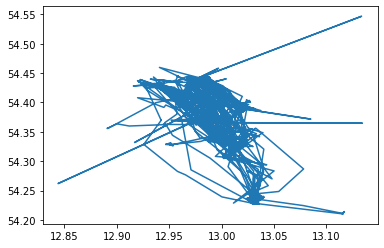

In [127]:
create_plot(Nena,'location-long','location-lat') 

#### Create a plot MatplotLib on CartopyMap.

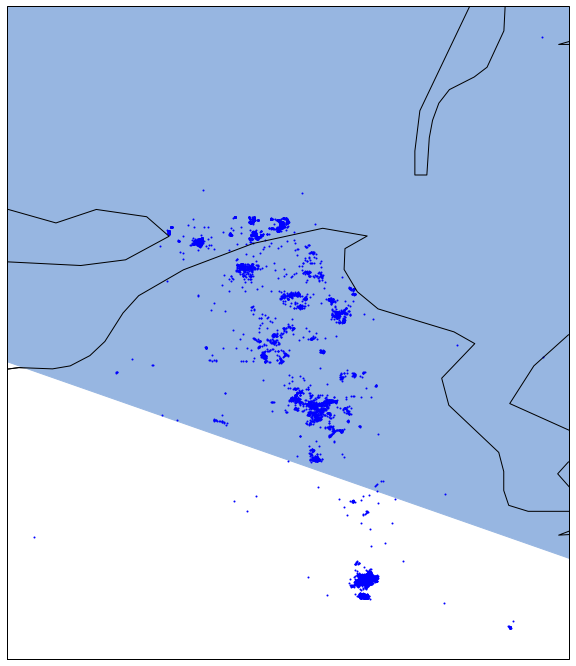

In [128]:
dfs_on_cartopymap([Nena],'location-long','location-lat','blue',1)

### Compare the datasets to check if all the columns are the same.

In [129]:
compare_sets(Lotta.columns,Nena.columns)

'Sets are equal'


### Visualize  German Crane datasets

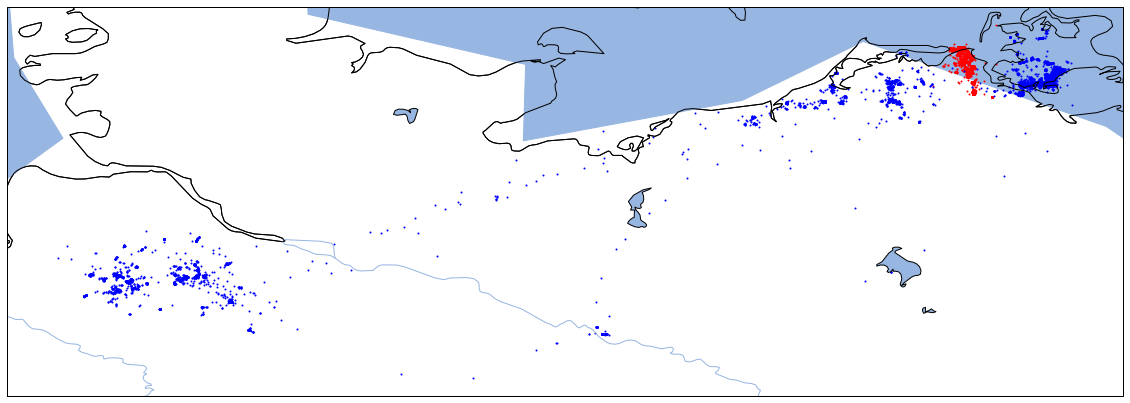

In [130]:
#Create the plot and assign size of the figure
plt.figure(figsize = (20, 12))

# Create the axes of the plot and assign the projection
m = plt.axes(projection=ccrs.PlateCarree())

# Create high resolution for coastal line
m.coastlines(resolution='10m')

# Add the land with a black edge color and white fill
m.add_feature(cartopy.feature.LAND.with_scale('10m'), edgecolor='black', facecolor = "white")

# Add the sea 
m.add_feature(cfeature.OCEAN) 

# Add lakes with a black edge color
m.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor = 'black')

# Add rivers
m.add_feature(cfeature.RIVERS.with_scale('10m')) 

# Add borders
m.add_feature(cfeature.BORDERS.with_scale('10m'))


# Add First Crane set (181527)
m.scatter(Nena['location-long'],Nena['location-lat'],color="red", s = 1) 

# Add Second Crane set (181527)
m.scatter(Lotta['location-long'], Lotta['location-lat'],color="blue", s = 1)


---
### Filter German crane datasets

In [131]:
columns_to_filter = ['event-id', 'study-name',
                     'timestamp','visible',
                     'ground-speed','heading',
                     'location-long','location-lat',
                     'height-above-msl',
                     'individual-taxon-canonical-name',
                     'sensor-type','tag-voltage',                                          
                     'individual-local-identifier']

Filtered_Nena = Nena[columns_to_filter]


Filtered_Lotta = Lotta[columns_to_filter]

---
### Export German Crane datasets to JSON

Create a json file en writing the contents of the dataframe using to_json() function.

- Parameter 1: filename of file that will be created
- Parameter 2: Orientation of the data. <br>

orientation "records" makes list like [{column -> value},{column -> value},....]

In [132]:
Filtered_Nena.to_json(
    '../Data/Crane_JSON/Nena-GE.json',
    orient = 'records')

Filtered_Lotta.to_json(
    '../Data/Crane_JSON/Lotta-GE.json',
    orient = 'records')

 ---
# Compare German and Swedish Crane datasets
---

In [134]:
compare_sets(Lotta.columns,Agnetha.columns)

(['IN GERMAN BUT NOT IN SWEDISH:',
  '',
  'acceleration-raw-x',
  'acceleration-raw-y',
  'acceleration-raw-z',
  'bar:barometric-height',
  'battery-charge-percent',
  'battery-charging-current',
  'external-temperature',
  'gps:satellite-count',
  'gps-time-to-fix',
  'height-above-msl',
  'import-marked-outlier',
  'gls:light-level',
  'mag:magnetic-field-raw-x',
  'mag:magnetic-field-raw-y',
  'mag:magnetic-field-raw-z',
  'orn:transmission-protocol'],
 ['IN SWEDISH BUT NOT IN GERMAN:',
  '',
  'argos:altitude',
  'gps:fix-type',
  'gps:vdop',
  'height-above-ellipsoid',
  'tag-tech-spec'],
 ['IN BOTH SETS:',
  '',
  'event-id',
  'visible',
  'timestamp',
  'location-long',
  'location-lat',
  'gps:hdop',
  'ground-speed',
  'heading',
  'tag-voltage',
  'sensor-type',
  'individual-taxon-canonical-name',
  'tag-local-identifier',
  'individual-local-identifier',
  'study-name'])

#### Swedish columns with their data type (19): 

|Column|Type|Desc.|
|--|--|--|
|event-id | int| The ID of the transmission (Unique) |
|visible|bool | Is the tracker still visible or not? | 
|timestamp |datetime| The DateTime of transmission |
|location-long| float|The Longitude location |
|location-lat | float| The Latitude location |
|argos:altitude|float | Argos type sensor for height of the transmission |
|gps:fix-type | int| Type of GPS Tracker |
|gps:hdop| float| Horizontal dilution of precision|
|gps:vdop| float| Vertical dilution of precision |
|ground-speed|float | Speed of the bird while on the ground. |
|heading | float| Direction the bird is faceing (In degrees) |
|height-above-ellipsoid | float| Height of the bird HAE -> MSL |
|tag-tech-spec |float | |
|tag-voltage|float | Voltage level of the tracker. |
|sensor-type|string | Type of sensor used in tracker. |
|individual-taxon-canonical-name | string|Name of the bird, in latin. |
|tag-local-identifier |int |ID of the tracker.  |
|individual-local-identifier |int |ID of the bird |
|study-name | string|Name of the study |



#### German columns with their data type (30): 

|Column|Type|Desc.|
|--|--|--|
|event-id | int| The ID of the transmission (Unique) |
|visible|bool | Is the tracker still visible or not? | 
|timestamp |datetime| The DateTime of transmission |
|location-long| float|The Longitude location |
|location-lat | float| The Latitude location |
|acceleration-raw-x|float|Speed +/- from last transmission x |
|acceleration-raw-y|float|Speed +/- from last transmission y |
|acceleration-raw-z|float|Speed +/- from last transmission z |
|bar:barometric-height |float|Pressure on the sensor. |
|battery-charge-percent|int| Battery power left in percentage.|
|battery-charging-current |float| Current running trough the battery in Ampere|
|external-temperature  |float|Temperature of the tracker measured in degrees celsius|
|gps:hdop| float| Horizontal dilution of precision|
|gps:satelitte-count |int | |
|gps-time-to-fix|float |time to acquire satellite signals in seconds.|
|ground-speed|float | Speed of the bird while on the ground. |
|heading | float| Direction the bird is faceing (In degrees) |
|height-above-msl | float| Height of the bird (above mean sea level) |
|import-marked-outlier|bool||
|gls:light-level| float|Amount of light recieved by tracker, measured in ambient light level|
|mag:magnetic-field-raw-x | float||
|mag:magnetic-field-raw-y |float||
|mag:magnetic-field-raw-z | float||
|orn:transmission-protocol | string |Type of transmission protocol |
|tag-voltage |float| Voltage level of the tracker. |
|sensor-type | string |Type of sensor used in tracker.  |
|individual-taxon-canonical-name | string | Name of the bird, in latin. |
|tag-local-identifier| int | ID of the tracker |
|individual-local-identifier | int|ID of the crane |
|study-name |string|Name of the study |


#### columns in both data set:

|Column|Type|Desc.|
|--|--|--|
|event-id | int| The ID of the transmission (Unique) |
|visible|bool | Is the tracker still visible or not? | 
|timestamp |datetime| The DateTime of transmission |
|location-long| float|The Longitude location |
|location-lat | float| The Latitude location |
|gps:hdop| float| Horizontal dilution of precision|
|ground-speed|float | Speed of the bird while on the ground. |
|heading | float| Direction the bird is faceing (In degrees) |
|tag-voltage |float| Voltage level of the tracker. |
|sensor-type | string |Type of sensor used in tracker.  |
|individual-taxon-canonical-name | string | Name of the bird, in latin. |
|tag-local-identifier| int | ID of the tracker |
|individual-local-identifier | int|ID of the crane |
|study-name |string|Name of the study |


#### Different columns with equalivent meaning:

|German|Swedish|
|--|--|
|height-above-msl | height-above-ellipsiod|

#### In Swedish sets but not in German:

|Column|Type|Desc.|
|--|--|--|
|acceleration-raw-x|float|Speed +/- from last transmission x |
|acceleration-raw-y|float|Speed +/- from last transmission y |
|acceleration-raw-z|float|Speed +/- from last transmission z |
|bar:barometric-height |float|Pressure on the sensor. |
|battery-charge-percent|int| Battery power left in percentage.|
|battery-charging-current |float| Current running trough the battery in Ampere|
|external-temperature  |float|Temperature of the tracker measured in degrees celsius|
|gps:satelitte-count |int | |
|gps-time-to-fix|float |time to acquire satellite signals in seconds.|
|import-marked-outlier|bool||
|gls:light-level| float|Amount of light recieved by tracker, measured in ambient light level|
|mag:magnetic-field-raw-x | float||
|mag:magnetic-field-raw-y |float||
|mag:magnetic-field-raw-z | float||
|orn:transmission-protocol | string |Type of transmission protocol |

#### In Swedish sets but not in German:

|Column|Type|Desc.|
|--|--|--|
|argos:altitude|float | Argos type sensor for height of the transmission |
|gps:fix-type | int| Type of GPS Tracker |
|gps:vdop| float| Vertical dilution of precision |
|height-above-ellipsoid | float| Height of the bird HAE -> MSL |
|tag-tech-spec |float | |


#### Sensors in Swedish

|X|Sensors|Desc|
|--|--|--|
|1|ARGOS||
|2|GPS|Location sensor|


#### Sensors in German

|X|Sensors|Desc|
|--|--|--|
|1|BAR|Baromatric sensor|
|2|GPS|Location sensor|
|3|MAG|A MEMS magnetic field sensor|
|4|ORN|A transmission protocol sensor|
|5|GLS|A light level geolocator,|



---
# Lithuanian Cranes

Attaching the transmitters was done in a place called Grimsås, Sweden. 

Some info about the data set:
- The tracker contains a GPS sensor and a few other environmental sensors, of which the sensor data every 15 minutes (4x / hour) if an SMS message is sent via a GSM channel sent. All that sensor data can be found in the logbook.
- The color ring code of this crane is RRW-BuGBk and can be found in the column Search Studies by clicking on the small black web link Implementations, along with its tracker ID and the ring number of the metal ring with which the bird is ringed.
- Details: the most famous location is North-East France.

This datasets are obtained from https://www.movebank.org/. 

---
## Lita
### A Lithuanian Crane 

---

#### Perform basic analyses of Crane dataset and assign the returned dataframe to a variable.

In [7]:
Lita = basic_analysis('../Data/Crane_CSV/20200103_Movebank_Common_Crane_Lithuania_GPS_2016_Dataset.csv')
Lita

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3242: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):



--------------------------------BASIC INFORMATION-------------------------------


Dataframe length: 254228

Dataframe columns:31

Start date of study :0    2016-07-30 06:43:06.000
Name: timestamp, dtype: object

Start position (latitude) :0    54.59235
Name: location-lat, dtype: float64

Start position (longitude) :0    24.609076
Name: location-long, dtype: float64

End date of study :254227    2020-01-02 02:54:13.000
Name: timestamp, dtype: object

End position (latitude) :254227    53.019016
Name: location-lat, dtype: float64

End position (longitude) :254227    13.25302
Name: location-long, dtype: float64


------------------------------COLUMNS AND DATA TYPES----------------------------


event-id                             int64
visible                               bool
timestamp                           object
location-long                      float64
location-lat                       float64
acceleration-raw-x                 float64
acceleration-raw-y                 floa

,event-id,visible,timestamp,location-long,location-lat,acceleration-raw-x,acceleration-raw-y,acceleration-raw-z,bar:barometric-height,battery-charge-percent,...,mag:magnetic-field-raw-x,mag:magnetic-field-raw-y,mag:magnetic-field-raw-z,orn:transmission-protocol,tag-voltage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,1890956035,True,2016-07-30 06:43:06.000,24.609076,54.592350,-6.0,-276.0,996.0,0.0,100,...,0.120,0.234,0.465,GPRS,4150.0,gps,Grus grus,16121,16121,"Common Crane Lithuania GPS, 2016"
1,1890956036,True,2016-07-30 06:48:11.000,24.608965,54.592312,-545.0,-721.0,-503.0,0.0,100,...,0.334,-0.017,1.340,GPRS,4150.0,gps,Grus grus,16121,16121,"Common Crane Lithuania GPS, 2016"
2,1890956037,True,2016-07-30 06:53:38.000,24.609467,54.592541,-89.0,-1018.0,96.0,0.0,100,...,0.101,-0.393,0.953,GPRS,4153.0,gps,Grus grus,16121,16121,"Common Crane Lithuania GPS, 2016"
3,1890956038,True,2016-07-30 06:58:59.000,24.613049,54.592113,209.0,-899.0,67.0,0.0,100,...,0.172,-0.400,0.803,GPRS,4156.0,gps,Grus grus,16121,16121,"Common Crane Lithuania GPS, 2016"
4,1890956039,True,2016-07-30 07:04:35.000,24.615448,54.591953,223.0,-978.0,245.0,0.0,100,...,0.253,-0.361,0.727,GPRS,4156.0,gps,Grus grus,16121,16121,"Common Crane Lithuania GPS, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254223,13660493274,True,2020-01-02 00:51:35.000,13.253458,53.019535,-145.0,6.0,-990.0,0.0,46,...,0.393,-0.349,1.672,GPRS,3836.0,gps,Grus grus,16121,16121,"Common Crane Lithuania GPS, 2016"
254224,13660493275,True,2020-01-02 01:21:54.000,13.253500,53.019470,-99.0,-14.0,-992.0,0.0,45,...,0.381,-0.356,1.684,GPRS,3833.0,gps,Grus grus,16121,16121,"Common Crane Lithuania GPS, 2016"
254225,13660493276,True,2020-01-02 01:52:35.000,13.253335,53.019558,-120.0,-29.0,-997.0,0.0,45,...,0.381,-0.361,1.683,GPRS,3833.0,gps,Grus grus,16121,16121,"Common Crane Lithuania GPS, 2016"
254226,13660493277,True,2020-01-02 02:23:29.000,13.253708,53.018757,-184.0,1.0,-973.0,0.0,45,...,0.407,-0.348,1.673,GPRS,3833.0,gps,Grus grus,16121,16121,"Common Crane Lithuania GPS, 2016"


#### Create a plot using MatplotLib.

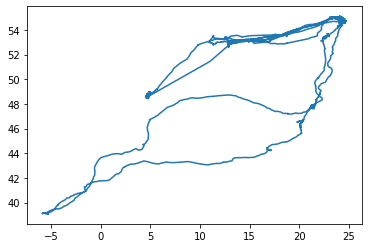

In [8]:
create_plot(Lita,'location-long','location-lat') 

#### Create a plot MatplotLib on CartopyMap.

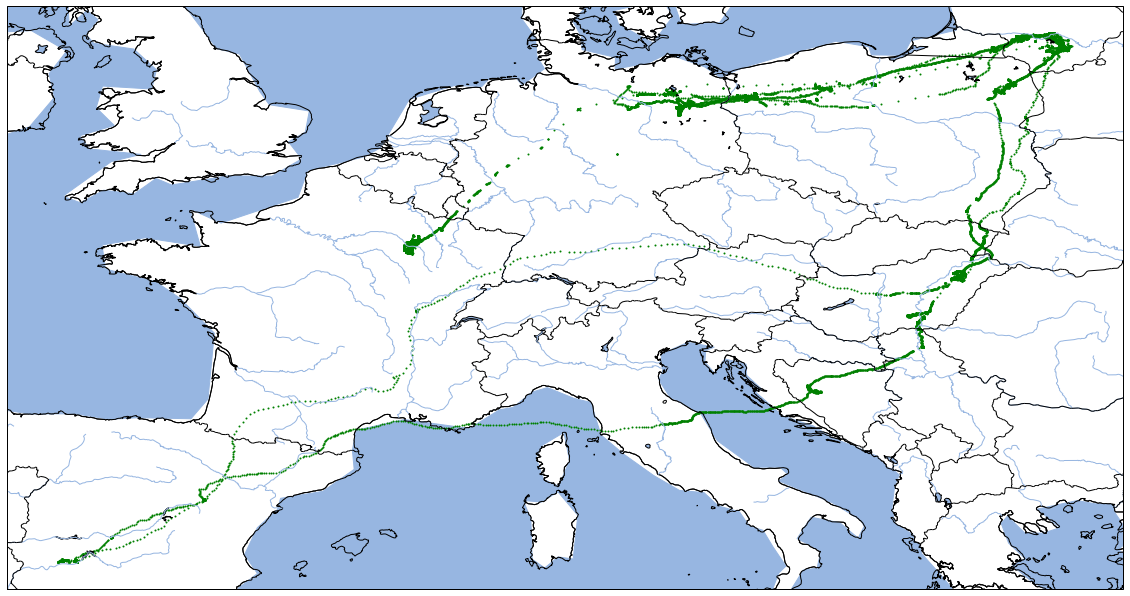

In [9]:
dfs_on_cartopymap([Lita],'location-long','location-lat','green',1)

In [10]:
columns_to_filter = ['event-id', 'study-name',
                     'timestamp','visible',
                     'ground-speed','heading',
                     'location-long','location-lat',
                     'height-above-msl',
                     'individual-taxon-canonical-name',
                     'sensor-type','tag-voltage',                                          
                     'individual-local-identifier']

Filtered_Lita = Lita[columns_to_filter]

In [11]:
Filtered_Lita[:1]

,event-id,study-name,timestamp,visible,ground-speed,heading,location-long,location-lat,height-above-msl,individual-taxon-canonical-name,sensor-type,tag-voltage,individual-local-identifier
0,1890956035,"Common Crane Lithuania GPS, 2016",2016-07-30 06:43:06.000,True,0.0,154.0,24.609076,54.59235,155.0,Grus grus,gps,4150.0,16121


In [12]:
Filtered_Lita.to_json(
    '../Data/Crane_JSON/Lita-LT.json',
    orient = 'records')

---
## TITLE
### SUBTITLE

---

#### Read the CSV dataset using Pandas.

#### Print the amount of datarows (Transmissions).

#### Print the amount of columns in the dataset.

#### Print information related to the start position / date.

#### Print information related to the end position / date.

#### Show first row of dataframe.

#### Print columnames and their datatypes.

#### Create a table and put the values, obtained from the line above, in that table.

#### Create a plot using MatplotLib.

#### Create a plot MatplotLib on CartopyMap.